## Import Library and Initialize Global Variables

In [1]:
# Import essential library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


# Import relevant functions from Scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,\
                            precision_score, recall_score, roc_curve,\
                            roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Import Imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Set to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set up to see more from Pandas functions displaying details
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Fixed a constant seed number to be used where required
SEED = 41

### What dataset are we using for this exercise?

You can find the complete description of the dataset [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).


## Load Database/Import Data 

In [2]:
df = pd.read_csv('myopia.csv', sep = ";")

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.
https://machinelearningmastery.com/understand-problem-get-better-results-using-exploratory-data-analysis/

### Understand Your Data with Descriptive Statistics

#### Taking a peek at the raw data

In [3]:
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
df.tail()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
613,614,1995,1,6,0,0.678,22.40,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,615,1993,0,6,1,0.665,22.50,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,616,1995,0,6,0,1.834,22.94,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,617,1991,0,6,1,0.665,21.92,3.688,3.598,14.64,12,2,1,0,15,23,0,0
617,618,1994,0,6,0,0.802,22.26,3.530,3.484,15.25,25,0,2,0,10,14,1,1


#### Review the dimensions of the data set

In [5]:
df.shape

(618, 18)

#### Review data types of attributes in the data

In [6]:
df.dtypes

ID             int64
STUDYYEAR      int64
MYOPIC         int64
AGE            int64
GENDER         int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

#### Check for signs of missing data

In [7]:
# df.isna().any().any()
df.isna().sum()

ID           0
STUDYYEAR    0
MYOPIC       0
AGE          0
GENDER       0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

#### Summary of data types and missing data info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         618 non-null    int64  
 1   STUDYYEAR  618 non-null    int64  
 2   MYOPIC     618 non-null    int64  
 3   AGE        618 non-null    int64  
 4   GENDER     618 non-null    int64  
 5   SPHEQ      618 non-null    float64
 6   AL         618 non-null    float64
 7   ACD        618 non-null    float64
 8   LT         618 non-null    float64
 9   VCD        618 non-null    float64
 10  SPORTHR    618 non-null    int64  
 11  READHR     618 non-null    int64  
 12  COMPHR     618 non-null    int64  
 13  STUDYHR    618 non-null    int64  
 14  TVHR       618 non-null    int64  
 15  DIOPTERHR  618 non-null    int64  
 16  MOMMY      618 non-null    int64  
 17  DADMY      618 non-null    int64  
dtypes: float64(5), int64(13)
memory usage: 87.0 KB


#### Summarize the distribution of instances across classes in your data

In [9]:
df.nunique()

ID           618
STUDYYEAR      6
MYOPIC         2
AGE            5
GENDER         2
SPHEQ        511
AL           254
ACD          206
LT           128
VCD          226
SPORTHR       40
READHR        16
COMPHR        18
STUDYHR       14
TVHR          28
DIOPTERHR     75
MOMMY          2
DADMY          2
dtype: int64

In [10]:
df['MYOPIC'].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [11]:
df['GENDER'].value_counts()

0    316
1    302
Name: GENDER, dtype: int64

In [12]:
df['MOMMY'].value_counts()

1    313
0    305
Name: MOMMY, dtype: int64

In [13]:
df['DADMY'].value_counts()

0    310
1    308
Name: DADMY, dtype: int64

#### Summarize the numberical data using descriptive statistics

In [14]:
df.describe()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,309.500000,1992.359223,0.131068,6.299353,0.488673,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382
std,178.545512,1.734507,0.337748,0.712950,0.500277,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402
min,1.000000,1990.000000,0.000000,5.000000,0.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,155.250000,1991.000000,0.000000,6.000000,0.000000,0.456250,22.040000,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,309.500000,1992.000000,0.000000,6.000000,0.000000,0.729000,22.465000,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,463.750000,1994.000000,0.000000,6.000000,1.000000,1.034000,22.970000,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,618.000000,1995.000000,1.000000,9.000000,1.000000,4.372000,24.560000,4.250000,4.112000,17.300000,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000


In [15]:
df.groupby('MYOPIC').sum()

,ID,STUDYYEAR,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
MYOPIC,,,,,,,,,,,,,,,,,
0,165746,1069891,3380,256,478.878,12075.42,1916.541,1903.232,8255.69,6582,1455,1114,815,4810,13848,258,252
1,25525,161387,513,46,16.146,1827.59,295.052,285.386,1247.16,805,273,187,106,720,2231,55,56


In [16]:
df.groupby('MYOPIC').mean()

,ID,STUDYYEAR,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
MYOPIC,,,,,,,,,,,,,,,,,
0,308.651769,1992.348231,6.294227,0.476723,0.891765,22.486816,3.568978,3.544194,15.373724,12.256983,2.709497,2.074488,1.517691,8.957169,25.787709,0.480447,0.469274
1,315.123457,1992.432099,6.333333,0.567901,0.199333,22.562840,3.642617,3.523284,15.397037,9.938272,3.370370,2.308642,1.308642,8.888889,27.543210,0.679012,0.691358


#### Understand the relationship in the data set using correlations

In [17]:
df.corr()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
ID,1.000000,-0.058385,0.012242,0.030029,-0.009072,0.050831,-0.080880,-0.018525,0.055831,-0.089469,0.054532,0.051438,0.045723,0.045283,-0.007511,0.063068,0.099317,-0.014204
STUDYYEAR,-0.058385,1.000000,0.016331,-0.439659,0.049524,0.082645,-0.138326,-0.087708,0.108677,-0.136459,-0.262745,-0.154631,-0.045047,-0.282425,-0.186834,-0.289733,0.032799,0.038017
MYOPIC,0.012242,0.016331,1.000000,0.018526,0.061557,-0.373639,0.037752,0.107953,-0.045704,0.011855,-0.098282,0.072749,0.025874,-0.031859,-0.004032,0.036984,0.134033,0.149896
AGE,0.030029,-0.439659,0.018526,1.000000,-0.088176,-0.118255,0.220784,0.191849,-0.185531,0.202472,0.057538,0.130194,0.056929,0.399324,0.069395,0.286820,-0.039515,-0.055427
GENDER,-0.009072,0.049524,0.061557,-0.088176,1.000000,0.032448,-0.338276,-0.253011,0.074874,-0.276262,-0.103200,0.086133,-0.255194,0.024752,-0.028529,-0.047767,-0.025605,-0.009785
SPHEQ,0.050831,0.082645,-0.373639,-0.118255,0.032448,1.000000,-0.305512,-0.238784,0.072699,-0.247130,-0.022468,-0.099501,-0.031088,-0.054873,-0.080934,-0.120611,-0.131860,-0.140113
AL,-0.080880,-0.138326,0.037752,0.220784,-0.338276,-0.305512,1.000000,0.456296,-0.328939,0.941916,0.112004,0.017944,0.086328,0.098326,0.077170,0.111527,0.046948,-0.010278
ACD,-0.018525,-0.087708,0.107953,0.191849,-0.253011,-0.238784,0.456296,1.000000,-0.339291,0.199447,0.075161,0.011481,0.071666,0.051826,-0.042761,0.040157,0.115974,0.053746
LT,0.055831,0.108677,-0.045704,-0.185531,0.074874,0.072699,-0.328939,-0.339291,1.000000,-0.451594,-0.032745,0.018481,-0.025344,-0.037580,0.049095,0.002875,-0.011127,-0.015586
VCD,-0.089469,-0.136459,0.011855,0.202472,-0.276262,-0.247130,0.941916,0.199447,-0.451594,1.000000,0.096235,0.010120,0.069369,0.091759,0.082579,0.099774,0.009987,-0.025398


#### Review the skew of distributions of each attribute

In [18]:
df.skew()

ID           0.000000
STUDYYEAR    0.042666
MYOPIC       2.191751
AGE          1.564905
GENDER       0.045429
SPHEQ        1.633061
AL           0.016751
ACD         -0.079303
LT           0.067207
VCD          0.107686
SPORTHR      1.005333
READHR       1.563552
COMPHR       3.312616
STUDYHR      2.812037
TVHR         0.972414
DIOPTERHR    1.356865
MOMMY       -0.025955
DADMY        0.006488
dtype: float64

### Understand Your Data with Visualization

In [19]:
target = 'MYOPIC'
df_features = df.drop([target], axis='columns')

#### Univariate Plots - Histograms

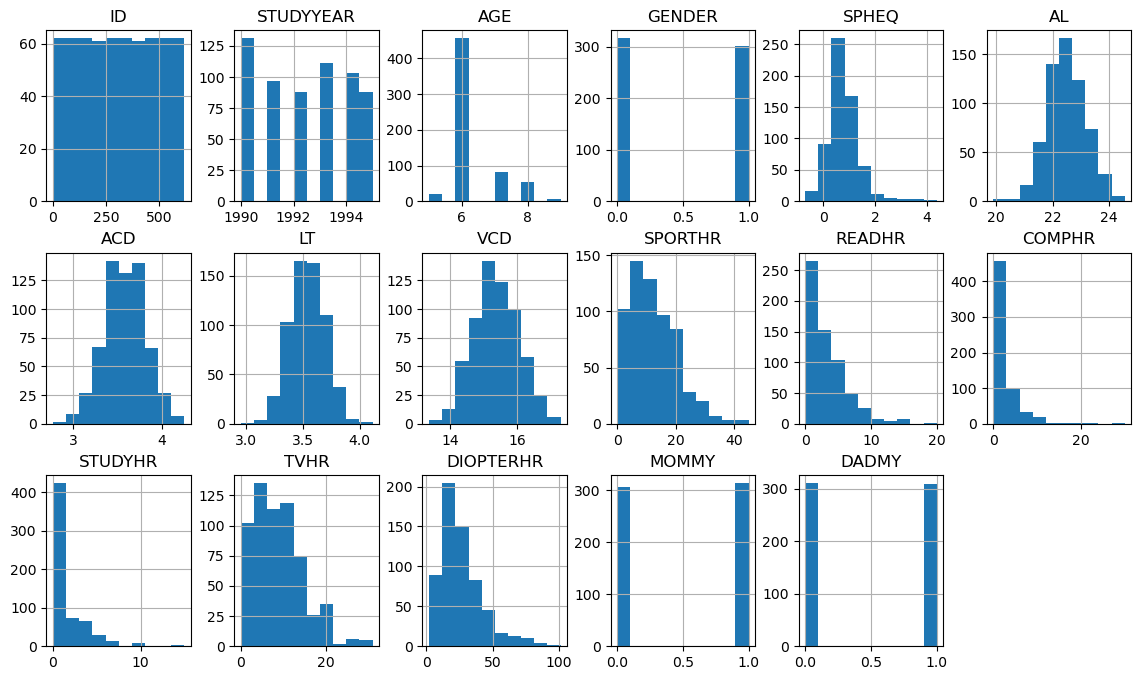

In [20]:
df_features.hist(figsize=(14,8), layout=(3,6))
plt.show()

#### Univariate Plots - Density Plots

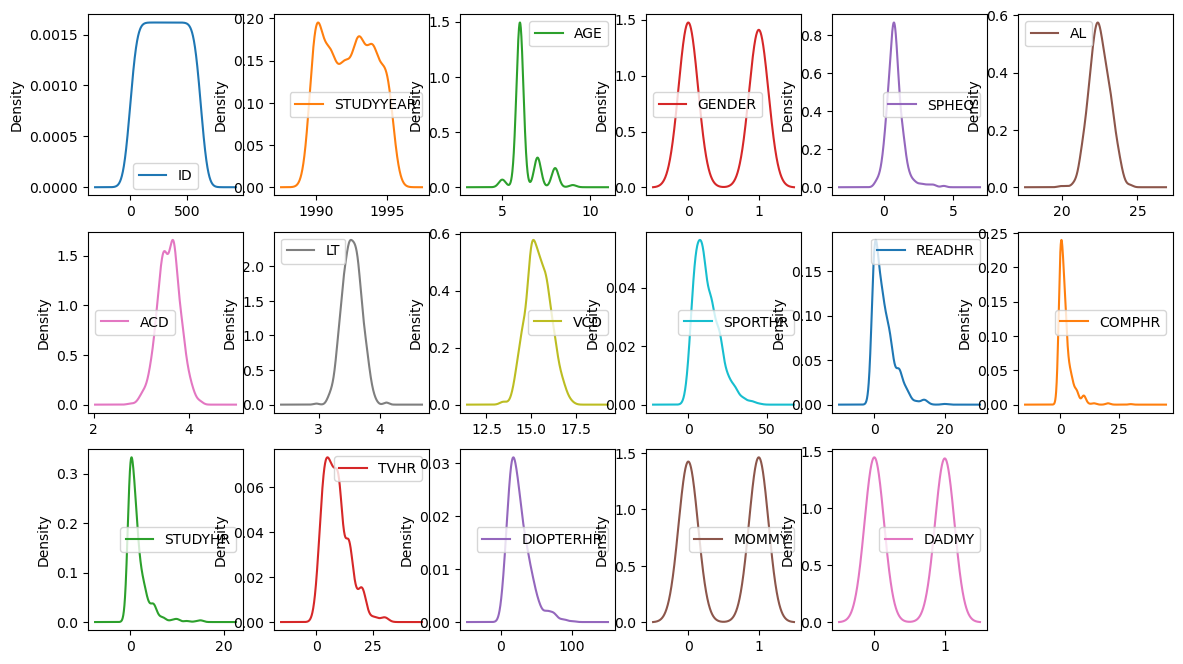

In [21]:
# df.plot(kind='density', figsize=(12,6), layout=(2,3), subplots=True)
df_features.plot.kde(figsize=(14,8), layout=(3,6), subplots=True, sharex=False)
plt.show()

#### Univariate Plots - Box and Whisker Plots

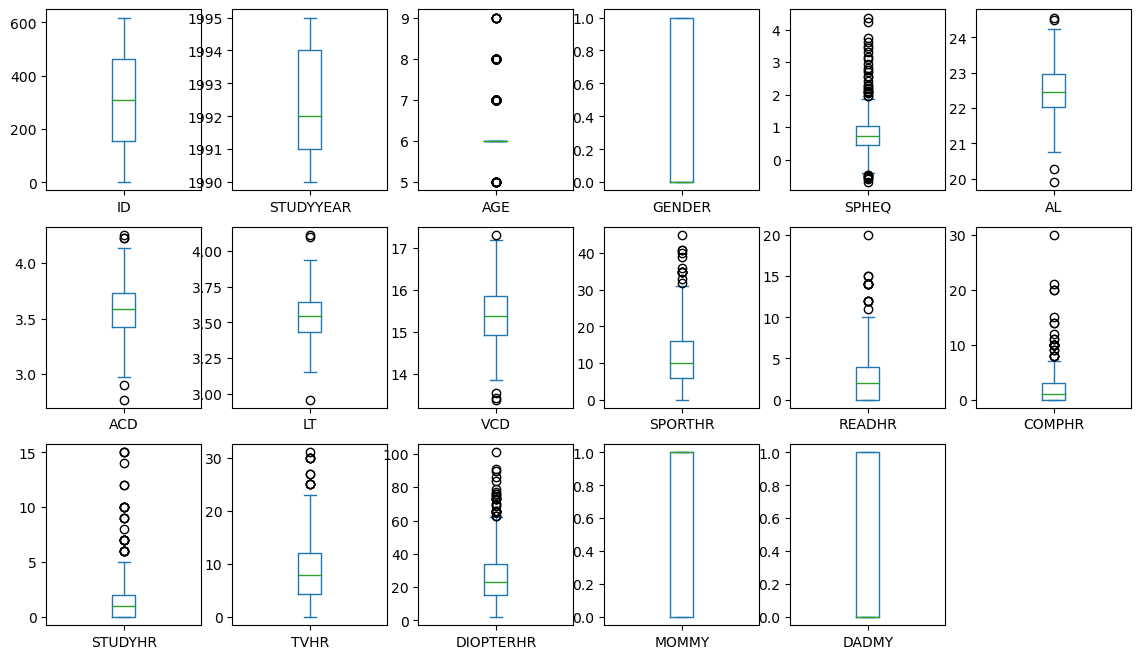

In [22]:
# df.boxplot(figsize=(8,6))
df_features.plot(kind='box', figsize=(14,8), layout=(3,6), subplots=True, sharey=False)
plt.show()

#### Univariate Plots - Violin Plots (alternate to Box and Whisker plot)

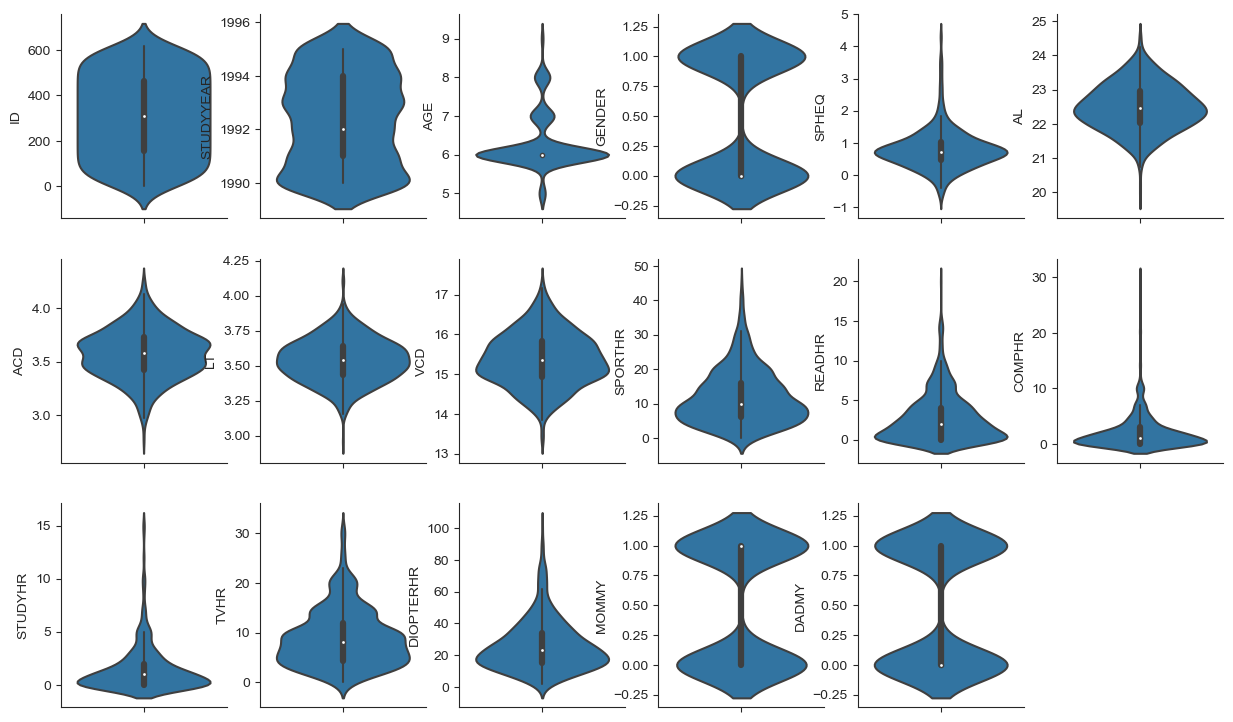

In [23]:
# save a list of numerical feature names
# it is not necessarily using all the features, below example assumes that
features = list(df_features.columns)

plt.figure(figsize=(15,9))
sns.set_style('ticks')

for i, feature in enumerate(features):
    plt.subplot(3, 6, i+1)
    sns.violinplot(data=df_features, y=feature)  
    
sns.despine()

#### Univariate Plots - Target count distribution

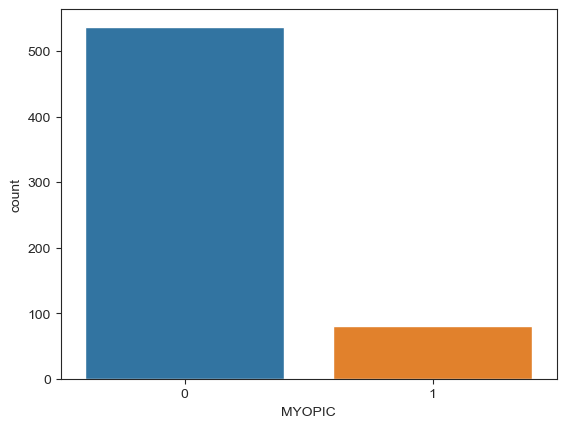

In [24]:
# only for categorical target
_ = sns.countplot(x=df[target], data=df_features)

#### Multivariate Plots - Correlation Matrix Plot

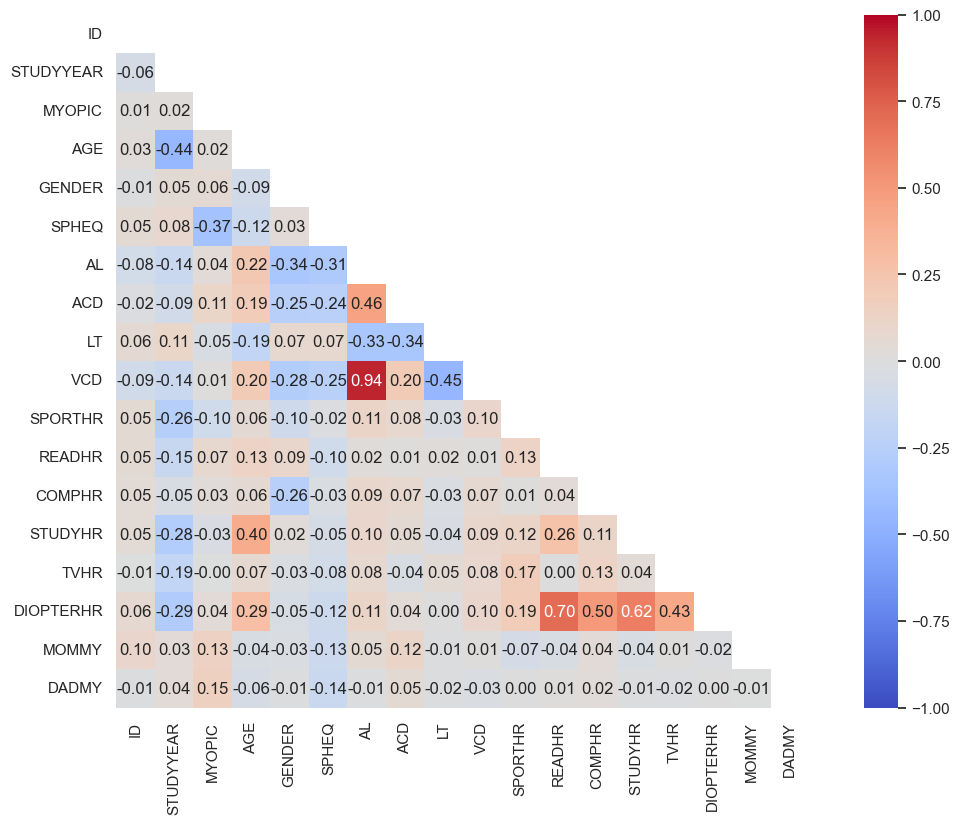

In [25]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(14,9))

# Plot the heatmap
_ = sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f') 

#### Multivariate Plots - Scatter Plot Matrix using Seaborn Pairplot

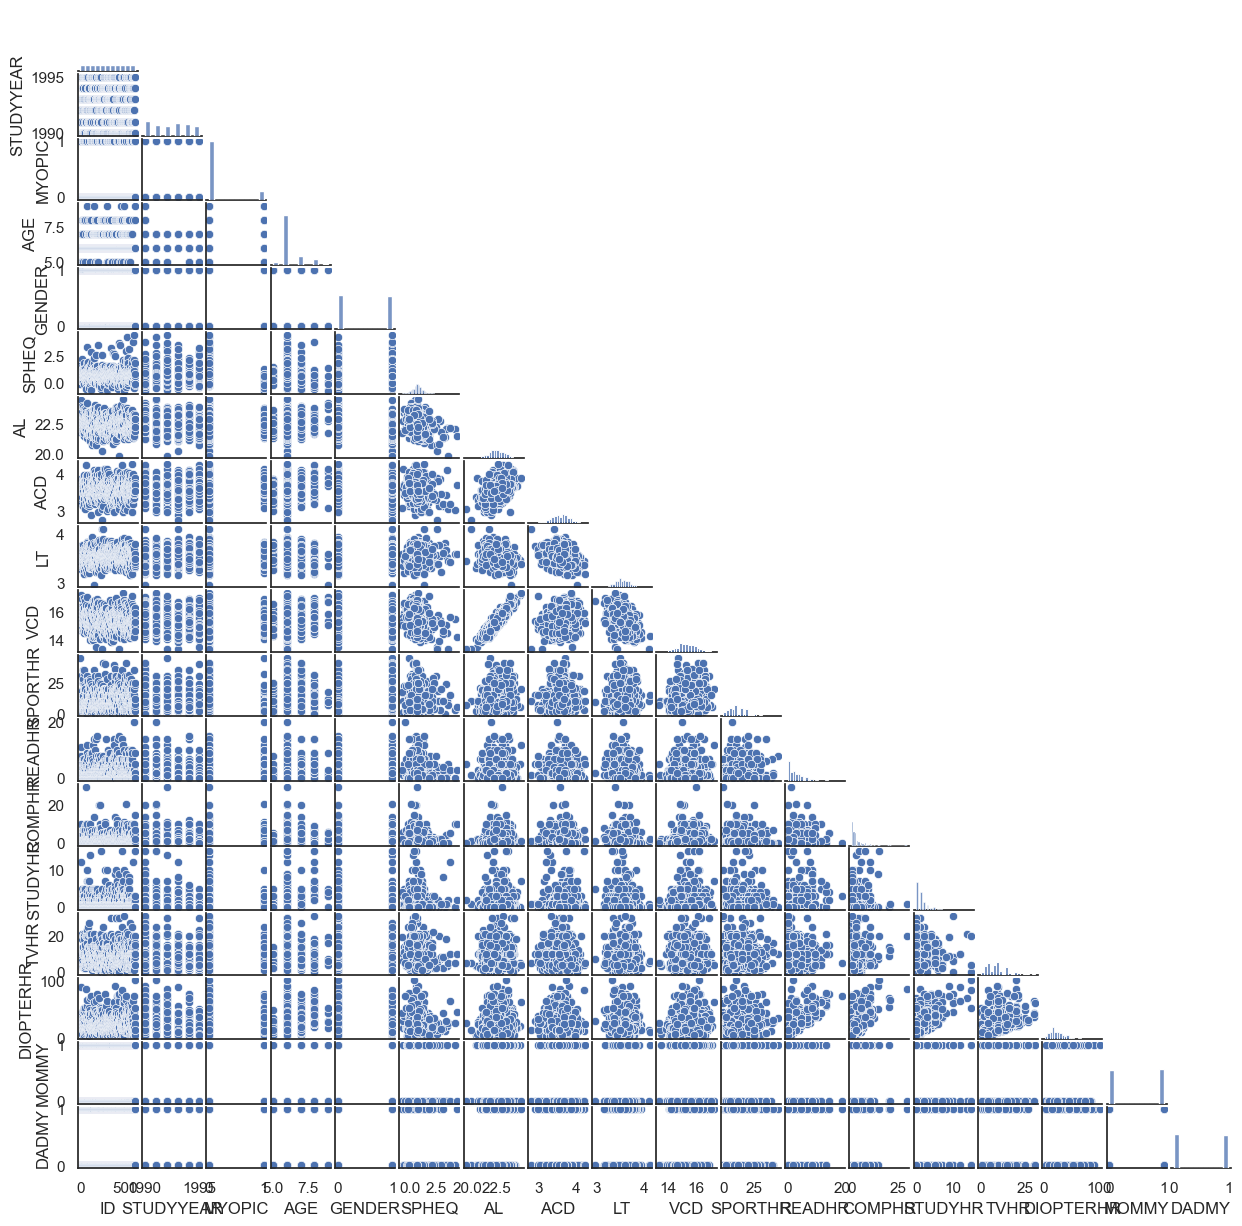

In [26]:
g = sns.pairplot(data=df, corner=True)
g.fig.set_size_inches(12,12)

#### Multivariate Plots - Distribution of categorical features with target classes

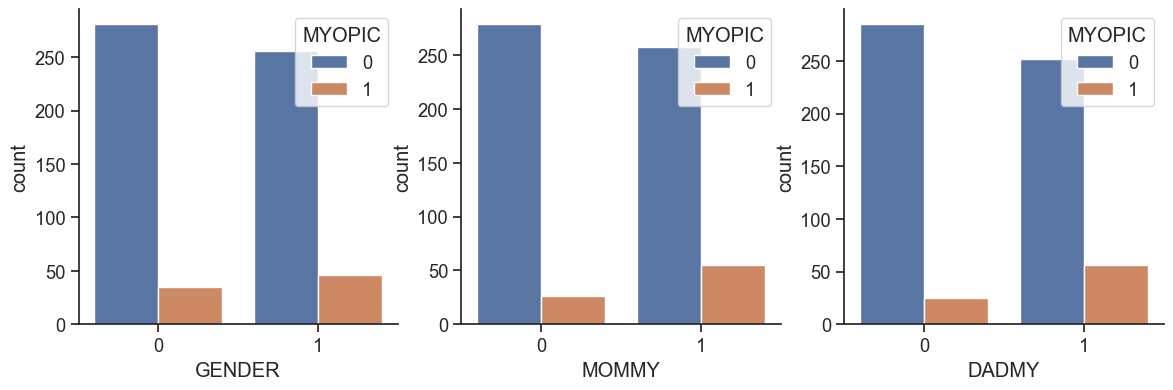

In [27]:
myopic_features = ['GENDER', 'MOMMY', 'DADMY']

plt.figure(figsize=(14, 9))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(myopic_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=feature, hue='MYOPIC')  
    
sns.despine()

#### Multivariate Plots - Density plots of numerical features vs target classes

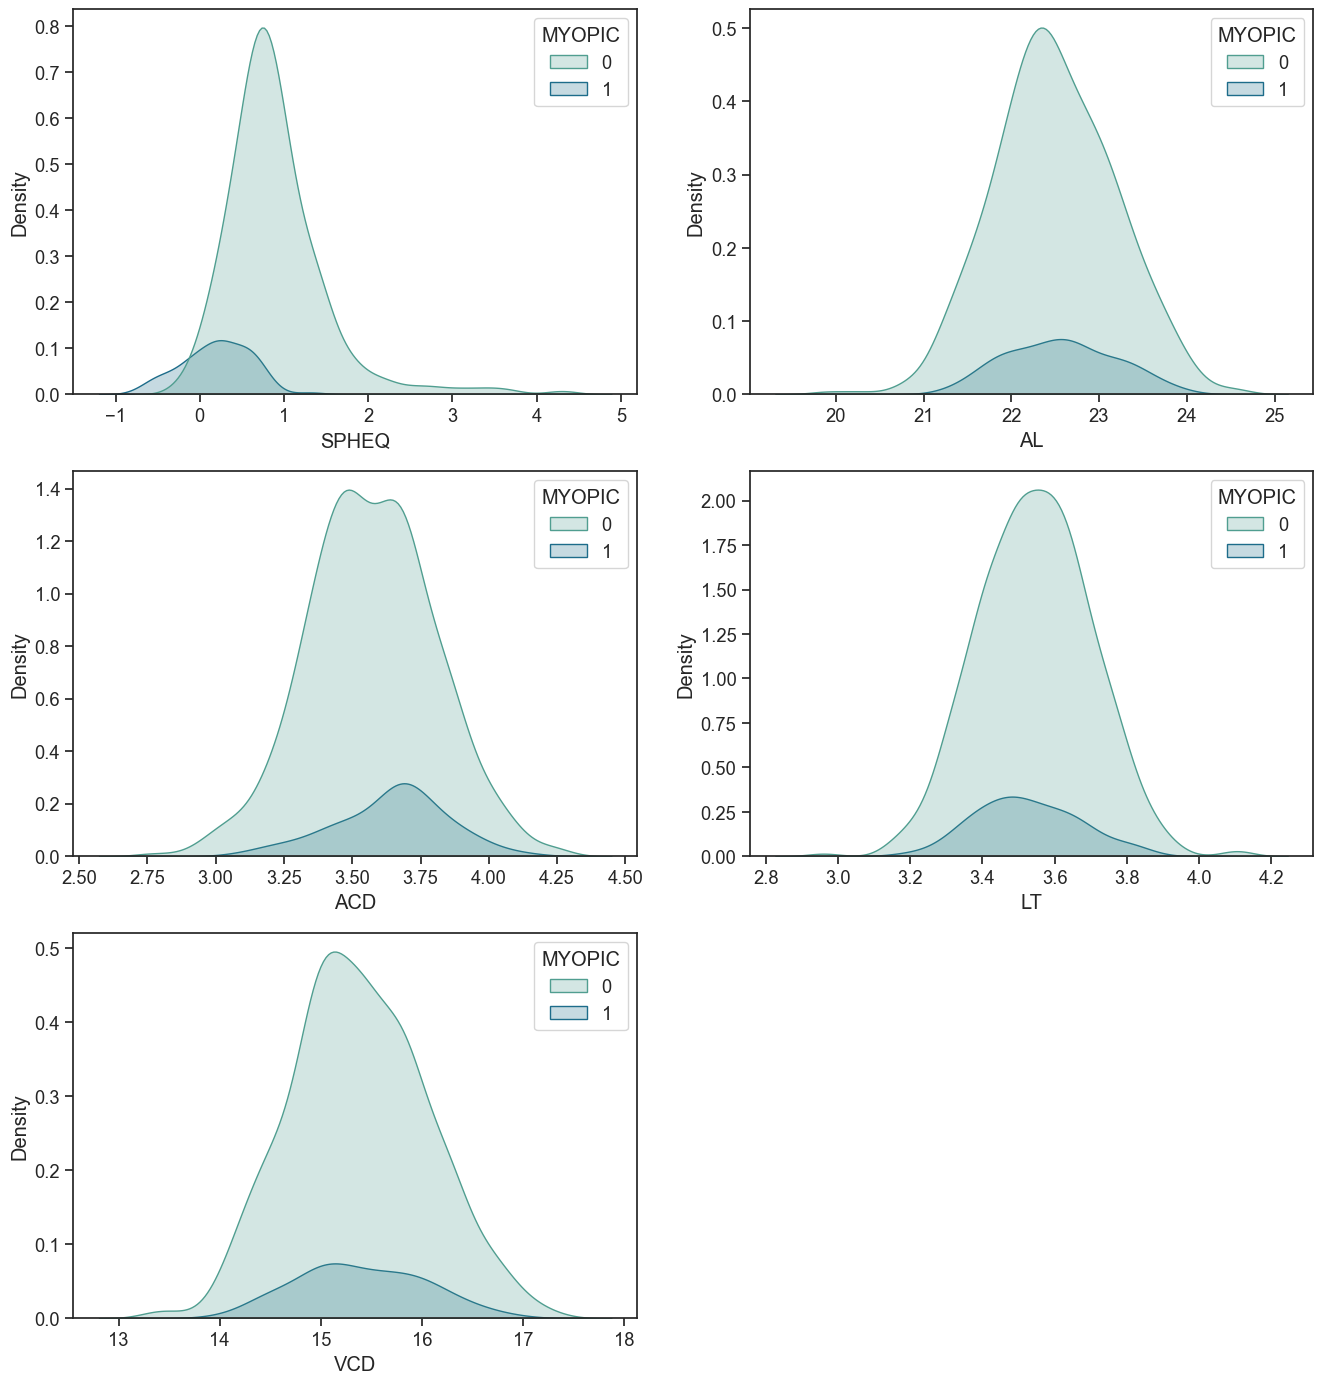

In [28]:
##### only for classification problem (target is categorical)

num_features = ['SPHEQ', 'AL', 'ACD', 'LT', 'VCD']

plt.figure(figsize=(16, 17))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(num_features):
    plt.subplot(3, 2, i+1)
    ax = sns.kdeplot(data=df, x=df[feature], hue='MYOPIC', shade=True, palette='crest')
    ax.set(xlabel=feature)

## Data Preparation
Based on the outcome of EDA, we will now prepare the data so that is ready for evaluation with a machine learning algorithem. We will start off by cleaning the data to ensure only accurate and relevant data are used. We may also transform existing features into new features or values which may help in improving the model performance.

- Data Cleaning
   
- Feature Extraction/Feature Engineering
    - Missing data imputation (usually done during data cleaning)
    - Numerical transformation (scaling, normalization)
    - Category encoder (one-hot encoding on features, or target/label encoding)
    - Dimension reduction (PCA, t-SNE)
    - https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
<br><br>
- Feature Selection (select a subset from all features)
<br>In all feature selection procedures, it is good practice to select the features by examining only the training set. This is done to avoid overfitting.
    - Correlation coefficient, information gain
    - SelectKBest, SelectPercentil from Scikit-learn
    - Feature Importances from Decision Tree, Random Forest
    - https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook
    - https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
    - https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

### Data Cleaning
We perform the following data cleaning tasks, so that the final data set is structured and ready for use:
- Imputation of missing data
- Dropping of rows with missing data
- Dropping of features/columns
- Removal of duplicates
- Correction of wrong data types
- Correction of spelling errors
- Stripping of leading/trailing spaces in text columns


#### Feature selection

In [29]:
# select features to drop from the data set
# VCD or AL due to high correlation
# READHR, COMPHR, STUDYHR, TVHR due to high correlation with DIOPTERHR
df.drop(['ID', 'STUDYYEAR', 'GENDER', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'VCD'], axis=1, inplace=True)

### Split Data (Features/Target, Training/Validation/Testing)

1. We split the data set into two parts:
    - X - representing features (feature columns)
    - y - representing target/label (target column)
2. We then further split into Training and Testing data set
    - X_train, y_train - feature and target components of training data set (used for training)
    - X_test, y_test - feature and target components of testing data set (used for prediction and evaluation)
    
**NB:** Where is the validation data set? As long as we are using K-fold cross validation methods in all of our model training, we do not need to further split the data set into three parts.

In [30]:
# split to features and target
X = df.drop(['MYOPIC'], axis=1)
y = df['MYOPIC']

In [31]:
# split into training and testing data set (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

### Feature Scaling (Normalization/Standardization)
Feature scaling will help optimization methods like Gradient Descent to converge faster, thus model training will also be faster. It will also help distance-based models to treat all features with equal importance.

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Handling Imbalanced Dataset
Test for both over sampling and under sampling

- Feature scaling before the over- and under-sampling

#### Baseline Score

In [33]:
lr_base = LogisticRegression(random_state=SEED)
lr_base.fit(X_train_scaled, y_train)

LogisticRegression(random_state=41)

In [34]:
print(classification_report(y_test, lr_base.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       108
           1       0.60      0.38      0.46        16

    accuracy                           0.89       124
   macro avg       0.76      0.67      0.70       124
weighted avg       0.87      0.89      0.88       124



#### SMOTE Score

In [35]:
# Using SMOTE for Oversampling
oversample = SMOTE(sampling_strategy=1)
X_train_smote, y_train_smote = oversample.fit_resample(X_train_scaled, y_train)

In [36]:
lr_smote = LogisticRegression(random_state=SEED)
lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=41)

In [37]:
print(classification_report(y_test, lr_smote.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       108
           1       0.35      0.75      0.48        16

    accuracy                           0.79       124
   macro avg       0.65      0.77      0.67       124
weighted avg       0.88      0.79      0.82       124



#### RandomUnderSampler Score

In [38]:
# Using RandomUnderSampler for Undersampling
undersample = RandomUnderSampler(sampling_strategy=1)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train_scaled, y_train)

In [39]:
lr_under = LogisticRegression(random_state=SEED)
lr_under.fit(X_train_undersample, y_train_undersample)

LogisticRegression(random_state=41)

In [40]:
print(classification_report(y_test, lr_under.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       108
           1       0.30      0.62      0.41        16

    accuracy                           0.77       124
   macro avg       0.62      0.71      0.63       124
weighted avg       0.85      0.77      0.80       124



## Model Selection

###  Baseline Model Training using K-fold Cross Validation
- For any classfication problems, we'd normally begin with a simple model like Logistic Regression.
- For any regression problems, we'd normally begin with Linear Regression.
- This is enough to set up a baseline measurement. Based on the baseline score, we can gauge quickly how well any ML model will perform with the underlying features.
- We are using k-fold cross validation to obtain a fairer, non-biased evaluation of the baseline model. 

In [41]:
%%time
baseline_model = LogisticRegression(random_state=SEED)
# baseline_model = LinearRegression()

scores = cross_val_score(baseline_model,
                         X_train_smote,
                         y_train_smote,
                         cv=5,
                         n_jobs=-1)

CPU times: total: 15.6 ms
Wall time: 2.56 s


In [42]:
baseline_mean_score = scores.mean()
print("Baseline Model's score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))

Baseline Model's score: 0.83 (avg) 0.03 (std)


### Multiple Model Evaluation and Comparison
- Once we are satisfied with the baseline model result, we can proceed to train multiple candidate models with or without any parameters
- We can easily reject any models that cannot perform significanly better than the baseline model
- Once we have determined the best model(s) out of all candidate models, we can proceed to the next stage to fine-tune the hyperparameters of selected model(s). The next stage is usually very resource expensive, hence we will only proceed with the best potential candidate model. If you have enough resources, you can consider to fine-tune more than one candidate model.

In [43]:
# prepare models
model_df = pd.DataFrame({'ID': ['LR', 'KNN', 'GB', 'SVM', 'DT', 'RF', 'MLP'],
                         'Name': ['Linear Regression', 'K-nearest Neighbour', 'Gaussian Naive Bayes', 
                                  'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Multi-layer Perceptron'],
                         'Estimator': [LogisticRegression(random_state=SEED), KNeighborsClassifier(), GaussianNB(), 
                                       SVC(random_state=SEED), DecisionTreeClassifier(random_state=SEED), 
                                       RandomForestClassifier(random_state=SEED),
                                       MLPClassifier(random_state=SEED)]})

# adding columns for storing results later
model_df['Results'] = 0
model_df['Mean_score'] = 0
model_df['Time_taken'] = 0

In [44]:
%%time
# lists to temporarily store collected results
results = []
time_taken = []

# evaluate each model in turn
for ID, estimator in model_df[['ID','Estimator']].values:
    start_time = time.process_time()
    cv_results = cross_val_score(estimator, 
                                 X_train_smote, 
                                 y_train_smote, 
                                 cv=5,
                                 n_jobs=-1)
    elapsed_time = time.process_time() - start_time
    
    results.append(cv_results)
    time_taken.append(elapsed_time)
    
    msg = "{:3}: Mean score {:.4f} (Std {:.4f}) - ({:.2f} s)".format(ID, cv_results.mean(), cv_results.std(), elapsed_time)
    print(msg)

LR : Mean score 0.8263 (Std 0.0257) - (0.03 s)
KNN: Mean score 0.8310 (Std 0.0152) - (0.00 s)
GB : Mean score 0.7937 (Std 0.0354) - (0.00 s)
SVM: Mean score 0.8892 (Std 0.0200) - (0.02 s)
DT : Mean score 0.8625 (Std 0.0289) - (0.02 s)
RF : Mean score 0.9091 (Std 0.0171) - (0.00 s)
MLP: Mean score 0.8986 (Std 0.0141) - (0.00 s)
CPU times: total: 62.5 ms
Wall time: 2.6 s


In [45]:
# saving collected results
model_df['Results'] = results
model_df['Mean_score'] = [s.mean() for s in results]
model_df['Time_taken'] = time_taken

In [46]:
# save a copy of results sorted by 'Mean Score'
model_df_sorted = model_df.sort_values('Mean_score', ascending=False)
model_df_sorted

,ID,Name,Estimator,Results,Mean_score,Time_taken
5,RF,Random Forest,RandomForestClassifier(random_state=41),"[0.8837209302325582, 0.936046511627907, 0.9127...",0.909085,0.000000
6,MLP,Multi-layer Perceptron,MLPClassifier(random_state=41),"[0.877906976744186, 0.9011627906976745, 0.9186...",0.898599,0.000000
3,SVM,Support Vector Machine,SVC(random_state=41),"[0.877906976744186, 0.8953488372093024, 0.9244...",0.889242,0.015625
4,DT,Decision Tree,DecisionTreeClassifier(random_state=41),"[0.8081395348837209, 0.872093023255814, 0.8604...",0.862525,0.015625
1,KNN,K-nearest Neighbour,KNeighborsClassifier(),"[0.8430232558139535, 0.8372093023255814, 0.848...",0.830960,0.000000
0,LR,Linear Regression,LogisticRegression(random_state=41),"[0.7906976744186046, 0.8546511627906976, 0.837...",0.826336,0.031250
2,GB,Gaussian Naive Bayes,GaussianNB(),"[0.7325581395348837, 0.8255813953488372, 0.831...",0.793696,0.000000


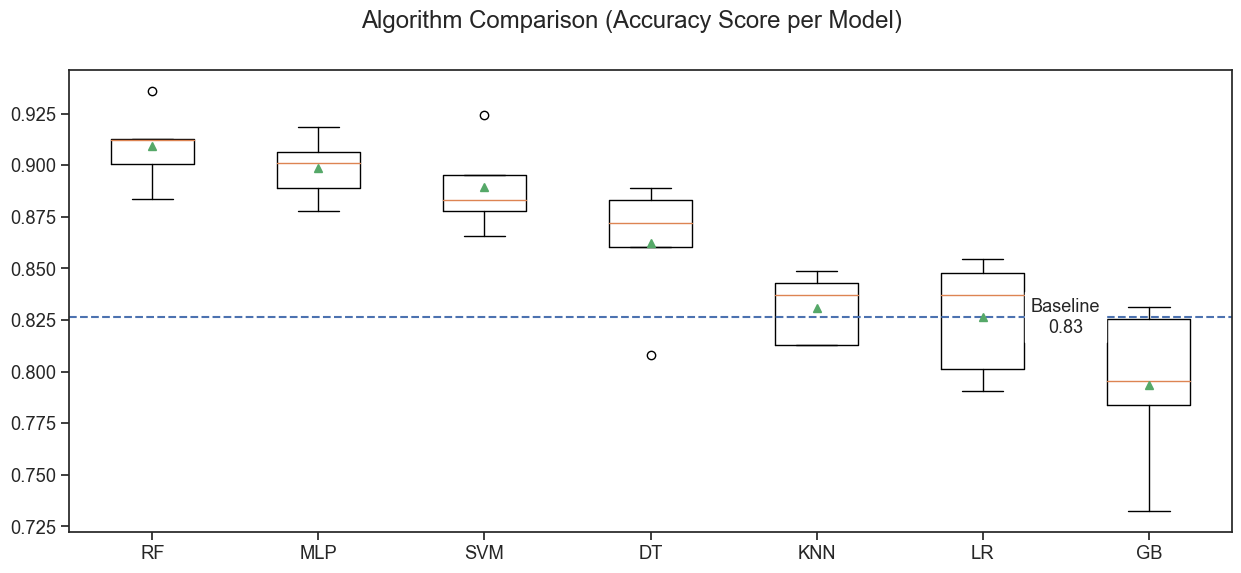

In [47]:
# boxplot algorithm comparison - sorted by mean score
# with this visualization, we can evaluate how well each model perform comparatively.
# this will help us decide better on selecting model(s) for further optimization 
# using hyperparameter fine-tuning task.

fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison (Accuracy Score per Model)')

ax = fig.add_subplot(111)
plt.boxplot(model_df_sorted['Results'], showmeans=True)
ax.set_xticklabels(model_df_sorted['ID'])

plt.axhline(y=baseline_mean_score, linestyle='--')
baseline_text = f"Baseline\n{baseline_mean_score:.2f}"
baseline_text_xpos = len(results) - 0.5

plt.text(x=baseline_text_xpos, y=baseline_mean_score, s=baseline_text, 
         fontsize=13, va='center', ha='center', backgroundcolor='w')
plt.show()

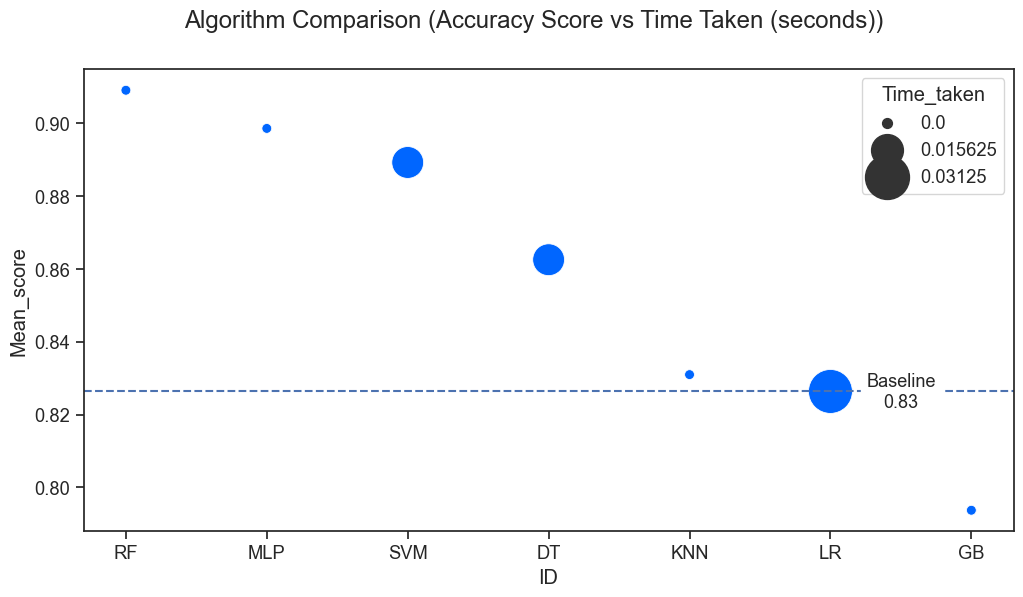

In [48]:
# scatter plot algorithem comparison - sorted by mean score, where bubble size is proportional to time taken
# with this chart, we can look at trade off between performance vs time-constraint.
# we can make a better judgement call on which would be the best model(s) to chooose
# for hyperparameter fine-tuning task

fig = plt.figure(figsize=(12,6))
fig.suptitle('Algorithm Comparison (Accuracy Score vs Time Taken (seconds))')
sns.scatterplot(data=model_df_sorted, x='ID', y='Mean_score', size='Time_taken', 
                sizes=(50, 1000), color='#0066ff')

plt.axhline(y=baseline_mean_score, linestyle='--')
baseline_text = f"Baseline\n{baseline_mean_score:.2f}"
baseline_text_xpos = len(results) - 1.5

plt.text(x=baseline_text_xpos, y=baseline_mean_score, s=baseline_text, 
         fontsize=13, va='center', ha='center', backgroundcolor='w')

plt.show()

### Improving the Final Model(s)
#### Hyperparameter Fine-tuning per Model
Search for a combination of parameters for each algorithm using scikit-learn that yields the best results
- Grid Search Parameter Tuning
- Random Search Parameter Tuning

#### Trade-off between getting a good score and managing within limited resources
We are always finding a balance between these two aspects of a machine learning project:
- Achieving a score to meet project target requirement
- Doing so while still able to meet the project deadline and not overspending budgeted resources (cloud services, human headcount, on-site computers and utility)
<br>

##### Fine-tuning for SVM

In [49]:
%%time
# Hyperparameter fine-tuning for Support Vector Machine
parameters = {'C': np.logspace(-3, 10, 25),
              'gamma': np.logspace(-4, 1, 25)}
    
gs_clf = GridSearchCV(SVC(random_state=SEED),
                      parameters, 
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)

_ = gs_clf.fit(X_train_undersample, y_train_undersample)

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)
print()

SVC(C=6.189658188912603, gamma=0.004641588833612782, random_state=41)
{'C': 6.189658188912603, 'gamma': 0.004641588833612782}
0.776923076923077

CPU times: total: 812 ms
Wall time: 1min 26s


In [50]:
svm_under_clf = gs_clf.best_estimator_

In [51]:
%%time
# Hyperparameter fine-tuning for Support Vector Machine
parameters = {'C': np.logspace(-3, 2, 25),
              'gamma': np.logspace(-4, 1, 25)}
    
gs_clf = GridSearchCV(SVC(random_state=SEED),
                      parameters, 
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)

_ = gs_clf.fit(X_train_smote, y_train_smote)

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)
print()

SVC(C=3.4807005884284132, gamma=0.5623413251903491, random_state=41)
{'C': 3.4807005884284132, 'gamma': 0.5623413251903491}
0.9685026519787842

CPU times: total: 1.67 s
Wall time: 11.5 s


In [52]:
svm_over_clf = gs_clf.best_estimator_

##### Fine-tuning for RF

In [53]:
%%time
# Hyperparameter fine-tuning for Random Forest
parameters = {'n_estimators': [20, 30, 50, 100, 200, 400],
              'max_depth': [5, 10, 15, 20, 25],
              'min_samples_split': [2, 3, 4, 5]}

gs_clf = GridSearchCV(RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=SEED),
                      parameters, 
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)

_ = gs_clf.fit(X_train_smote, y_train_smote)

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)
print()

RandomForestClassifier(max_depth=20, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=41)
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
0.9149122807017545

CPU times: total: 1.12 s
Wall time: 25.9 s


In [54]:
rf_over_clf = gs_clf.best_estimator_

In [55]:
%%time
# Hyperparameter fine-tuning for Random Forest
parameters = {'n_estimators': [20, 30, 50, 100, 200, 400],
              'max_depth': [5, 10, 15, 20, 25],
              'min_samples_split': [2, 3, 4, 5, 10, 15, 20]}

gs_clf = GridSearchCV(RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=SEED),
                      parameters, 
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)

_ = gs_clf.fit(X_train_undersample, y_train_undersample)

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)
print()

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                       n_jobs=-1, oob_score=True, random_state=41)
{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.7461538461538462

CPU times: total: 1.08 s
Wall time: 31.8 s


In [56]:
rf_under_clf = gs_clf.best_estimator_

##### Fine-tuning for MLP

In [57]:
%%time
# Hyperparameter fine-tuning for MLP
parameters = {'hidden_layer_sizes': [(100, 100), (200, 100), (100, 100, 50), (50, 100, 100), (50, 50, 100)],
              'max_iter': [100, 200, 300]}

gs_clf = GridSearchCV(MLPClassifier(random_state=SEED),
                      parameters, 
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)

_ = gs_clf.fit(X_train_smote, y_train_smote)

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)
print()

MLPClassifier(hidden_layer_sizes=(100, 100, 50), max_iter=100, random_state=41)
{'hidden_layer_sizes': (100, 100, 50), 'max_iter': 100}
0.949857201142391

CPU times: total: 3.64 s
Wall time: 9.95 s


In [58]:
mlp_over_clf = gs_clf.best_estimator_

In [59]:
%%time
# Hyperparameter fine-tuning for MLP
parameters = {'hidden_layer_sizes': [(100, 100), (200, 100), (100, 100, 50), (50, 100, 100), (50, 50, 100)],
              'max_iter': [100, 200, 300]}

gs_clf = GridSearchCV(MLPClassifier(random_state=SEED),
                      parameters, 
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)

_ = gs_clf.fit(X_train_undersample, y_train_undersample)

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)
print()

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=100, random_state=41)
{'hidden_layer_sizes': (100, 100), 'max_iter': 100}
0.7076923076923076

CPU times: total: 797 ms
Wall time: 1.87 s


In [60]:
mlp_under_clf = gs_clf.best_estimator_

### Evaluate the final, fine-tuned Model 
- Now that we have a finalized candidate model that has been fine-tuned, we will check whether it will generalize well with unseen data - testing dataset

#### Testing SVM Under Model

In [61]:
# using scaled X_test values to predict, we'll store the predicted values in y_pred
y_pred = svm_under_clf.predict(X_test_scaled)

In [62]:
# we can now evaluate via relevant metrics on how well the model can perform with unseen data
accuracy = accuracy_score(y_test, y_pred)

print('Final Model ({}) Metrics -'.format(svm_under_clf.__class__.__name__))
print('-'*60)
print(classification_report(y_test, y_pred))

Final Model (SVC) Metrics -
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       108
           1       0.28      0.69      0.39        16

    accuracy                           0.73       124
   macro avg       0.61      0.71      0.61       124
weighted avg       0.85      0.73      0.77       124



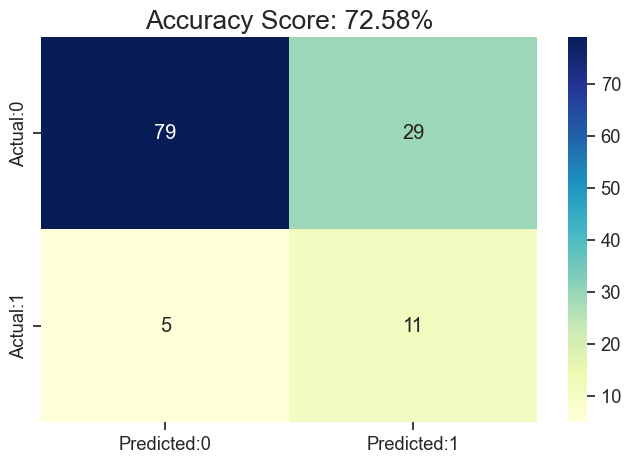

In [63]:
# for classification problems, confusion matrix can be helpful to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap = 'YlGnBu')

# print the scores on training and test set
cm_title = 'Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 19)

#### Testing SVM Over Model

In [64]:
# using scaled X_test values to predict, we'll store the predicted values in y_pred
y_pred = svm_over_clf.predict(X_test_scaled)

In [65]:
# we can now evaluate via relevant metrics on how well the model can perform with unseen data
accuracy = accuracy_score(y_test, y_pred)

print('Final Model ({}) Metrics -'.format(svm_over_clf.__class__.__name__))
print('-'*60)
print(classification_report(y_test, y_pred))

Final Model (SVC) Metrics -
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       108
           1       0.29      0.25      0.27        16

    accuracy                           0.82       124
   macro avg       0.59      0.58      0.58       124
weighted avg       0.81      0.82      0.82       124



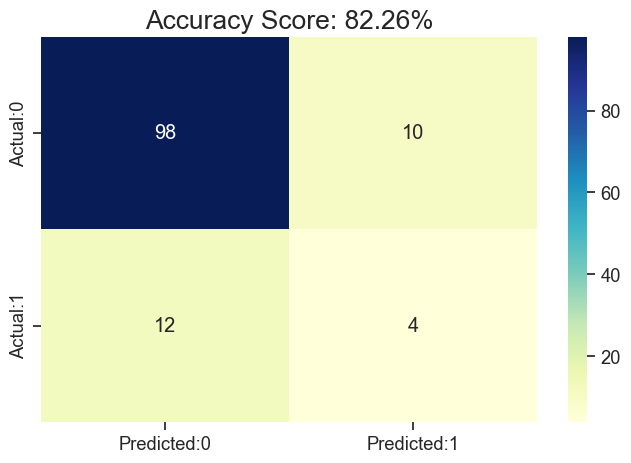

In [66]:
# for classification problems, confusion matrix can be helpful to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap = 'YlGnBu')

# print the scores on training and test set
cm_title = 'Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 19)

#### Testing RF under Model

In [67]:
# using scaled X_test values to predict, we'll store the predicted values in y_pred
y_pred = rf_under_clf.predict(X_test_scaled)

In [68]:
# we can now evaluate via relevant metrics on how well the model can perform with unseen data
accuracy = accuracy_score(y_test, y_pred)

print('Final Model ({}) Metrics -'.format(rf_under_clf.__class__.__name__))
print('-'*60)
print(classification_report(y_test, y_pred))

Final Model (RandomForestClassifier) Metrics -
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       108
           1       0.31      0.81      0.45        16

    accuracy                           0.74       124
   macro avg       0.64      0.77      0.64       124
weighted avg       0.88      0.74      0.78       124



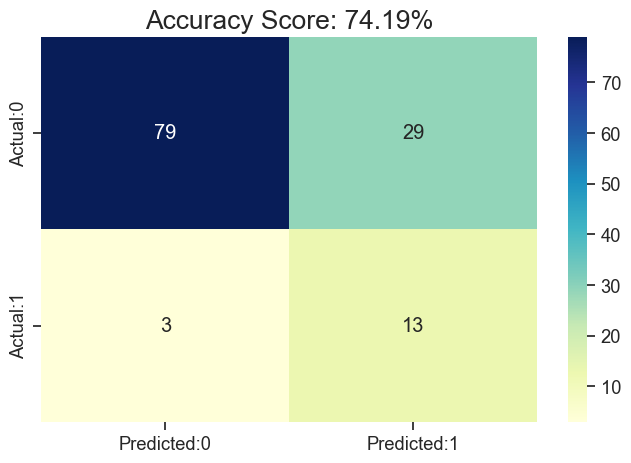

In [69]:
# for classification problems, confusion matrix can be helpful to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap = 'YlGnBu')

# print the scores on training and test set
cm_title = 'Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 19)

#### Testing RF over Model

In [70]:
# using scaled X_test values to predict, we'll store the predicted values in y_pred
y_pred = rf_over_clf.predict(X_test_scaled)

In [71]:
# we can now evaluate via relevant metrics on how well the model can perform with unseen data
accuracy = accuracy_score(y_test, y_pred)

print('Final Model ({}) Metrics -'.format(rf_over_clf.__class__.__name__))
print('-'*60)
print(classification_report(y_test, y_pred))

Final Model (RandomForestClassifier) Metrics -
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       108
           1       0.40      0.62      0.49        16

    accuracy                           0.83       124
   macro avg       0.67      0.74      0.69       124
weighted avg       0.87      0.83      0.85       124



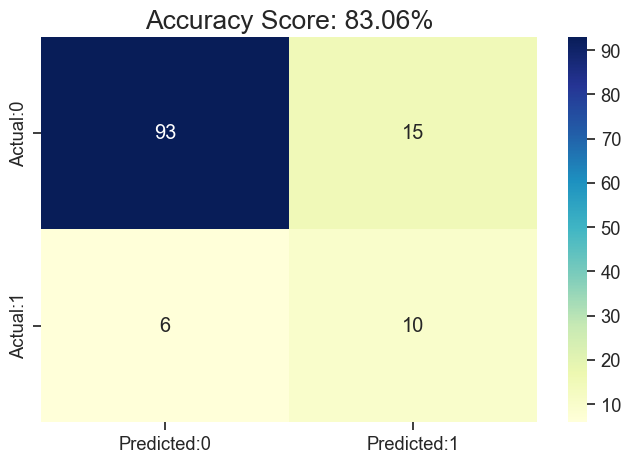

In [72]:
# for classification problems, confusion matrix can be helpful to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap = 'YlGnBu')

# print the scores on training and test set
cm_title = 'Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 19)

#### Testing MLP under Model

In [73]:
# using scaled X_test values to predict, we'll store the predicted values in y_pred
y_pred = mlp_under_clf.predict(X_test_scaled)

In [74]:
# we can now evaluate via relevant metrics on how well the model can perform with unseen data
accuracy = accuracy_score(y_test, y_pred)

print('Final Model ({}) Metrics -'.format(mlp_under_clf.__class__.__name__))
print('-'*60)
print(classification_report(y_test, y_pred))

Final Model (MLPClassifier) Metrics -
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       108
           1       0.29      0.62      0.39        16

    accuracy                           0.75       124
   macro avg       0.61      0.70      0.62       124
weighted avg       0.85      0.75      0.78       124



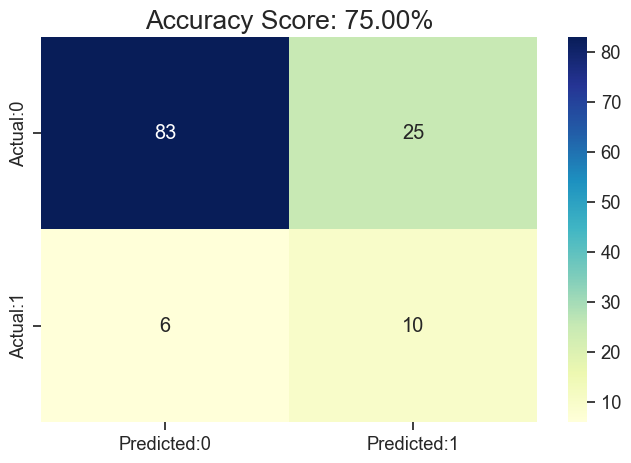

In [75]:
# for classification problems, confusion matrix can be helpful to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap = 'YlGnBu')

# print the scores on training and test set
cm_title = 'Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 19)

#### Testing MLP over Model

In [76]:
# using scaled X_test values to predict, we'll store the predicted values in y_pred
y_pred = mlp_over_clf.predict(X_test_scaled)

In [77]:
# we can now evaluate via relevant metrics on how well the model can perform with unseen data
accuracy = accuracy_score(y_test, y_pred)

print('Final Model ({}) Metrics -'.format(mlp_over_clf.__class__.__name__))
print('-'*60)
print(classification_report(y_test, y_pred))

Final Model (MLPClassifier) Metrics -
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       108
           1       0.39      0.56      0.46        16

    accuracy                           0.83       124
   macro avg       0.66      0.72      0.68       124
weighted avg       0.86      0.83      0.84       124



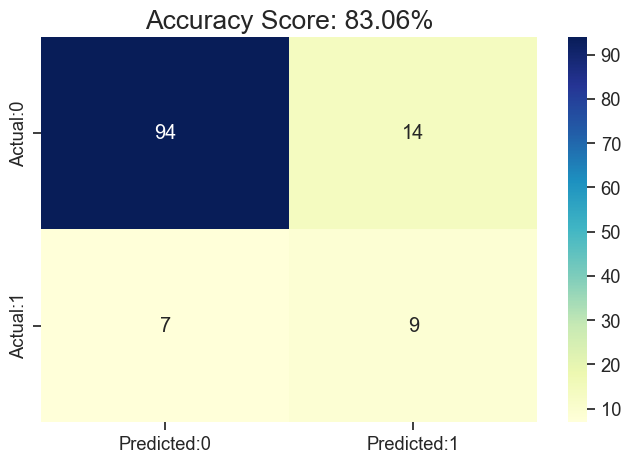

In [78]:
# for classification problems, confusion matrix can be helpful to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap = 'YlGnBu')

# print the scores on training and test set
cm_title = 'Accuracy Score: {:.2%}'.format(accuracy)

_ = plt.title(cm_title, size = 19)

In [79]:
# Selecting the best/ideal model out of the above tested models
final_clf = rf_over_clf

## Finalize Model

### Create standalone model trained on entire data set

In [80]:
# re-scale the features of the whole data set
X_scaled = scaler.transform(X)

# save a copy of the final tuned model trained on the whole data set
final_clf.fit(X_scaled, y)

RandomForestClassifier(max_depth=20, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=41)

In [81]:
# cursory check on the score
final_clf.score(X_test_scaled, y_test)

1.0

In [82]:
# using scaled X_test values to predict, we'll store the predicted values in y_pred
y_pred = final_clf.predict(X_scaled)

In [83]:
# we can now evaluate via relevant metrics on how well the model can perform with unseen data
accuracy = accuracy_score(y, y_pred)

print('Final Model ({}) Metrics -'.format(final_clf.__class__.__name__))
print('-'*60)
print(classification_report(y, y_pred))

Final Model (RandomForestClassifier) Metrics -
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       1.00      1.00      1.00        81

    accuracy                           1.00       618
   macro avg       1.00      1.00      1.00       618
weighted avg       1.00      1.00      1.00       618



### Save model using pickle
We can save the model so that you can reload it later without re-training it all over again

In [84]:
from pickle import dump, load

In [85]:
# save the model to disk
filename = 'finalized_model.sav'
dump(final_clf, open(filename, 'wb'))

In [86]:
# load the model from disk
final_clf = load(open(filename, 'rb'))

# cursory check on the score
final_clf.score(X_test_scaled, y_test)

1.0